In [ ]:
!git clone https://github.com/Reinforcement-Learning-F22/Traffic-Signal-Control-using-Deep-Q-Learning.git
%cd Traffic-Signal-Control-using-Deep-Q-Learning


fatal: destination path 'Traffic-Signal-Control-using-Deep-Q-Learning' already exists and is not an empty directory.
/content/Traffic-Signal-Control-using-Deep-Q-Learning


In [ ]:
# Install SUMO
!apt-get update
!apt-get install sumo sumo-tools sumo-doc

# Install Python dependencies
!pip install tensorflow sumolib traci pydot graphviz


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
# Update Training_Setup.ini
config_path = "Training_Setup.ini"

with open(config_path, "r") as file:
    lines = file.readlines()

updated_lines = []
for line in lines:
    if line.startswith("numEpisodes"):
        updated_lines.append("numEpisodes = 30\n")
    elif line.startswith("numLayers"):
        updated_lines.append("numLayers = 2\n")
    elif line.startswith("layerWidth"):
        updated_lines.append("layerWidth = 64\n")
    elif line.startswith("batchSize"):
        updated_lines.append("batchSize = 16\n")
    elif line.startswith("trainingEpochs"):
        updated_lines.append("trainingEpochs = 3\n")
    elif line.startswith("numCars"):
        updated_lines.append("numCars = 100\n")
    elif line.startswith("minMemorySize"):
        updated_lines.append("minMemorySize = 500\n")
    elif line.startswith("maxMemorySize"):
        updated_lines.append("maxMemorySize = 5000\n")
    else:
        updated_lines.append(line)

with open(config_path, "w") as file:
    file.writelines(updated_lines)

print("Updated Training_Setup.ini ✅")


Updated Training_Setup.ini ✅


In [ ]:
import os
os.environ["SUMO_HOME"] = "/usr/share/sumo"
print("SUMO_HOME set to:", os.environ["SUMO_HOME"])


SUMO_HOME set to: /usr/share/sumo


In [ ]:
!sumo --version



Eclipse SUMO sumo Version 1.12.0
 Build features: Linux-4.15.0-167-generic x86_64 GNU 11.2.0 None Proj GUI SWIG GDAL FFmpeg OSG GL2PS Eigen
 Copyright (C) 2001-2022 German Aerospace Center (DLR) and others; https://sumo.dlr.de

Eclipse SUMO sumo Version 1.12.0 is part of SUMO.
This program and the accompanying materials
are made available under the terms of the Eclipse Public License v2.0
which accompanies this distribution, and is available at
http://www.eclipse.org/legal/epl-v20.html
This program may also be made available under the following Secondary
Licenses when the conditions for such availability set forth in the Eclipse
Public License 2.0 are satisfied: GNU General Public License, version 2
or later which is available at
https://www.gnu.org/licenses/old-licenses/gpl-2.0-standalone.html
SPDX-License-Identifier: EPL-2.0 OR GPL-2.0-or-later


In [ ]:
!python Train_Main.py


2025-02-12 16:55:11.742599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-12 16:55:11.762574: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-12 16:55:11.768465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1739379314.209272   76070 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739379314.269485   76070 cuda_executor.cc:1015] succ

In [ ]:
!python Test_Main.py


2025-02-12 17:05:13.601708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-12 17:05:13.623488: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-12 17:05:13.630137: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1739379916.082827  133219 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739379916.147443  133219 cuda_executor.cc:1015] succ

In [ ]:
!ls /content/Traffic-Signal-Control-using-Deep-Q-Learning/models/model_2/test/


plot_queue_data.txt  plot_queue.png  plot_reward_data.txt  plot_reward.png  Testing_Setup.ini


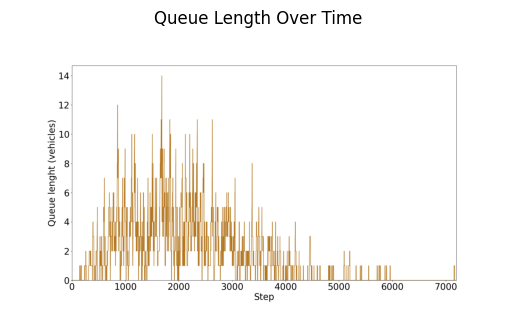

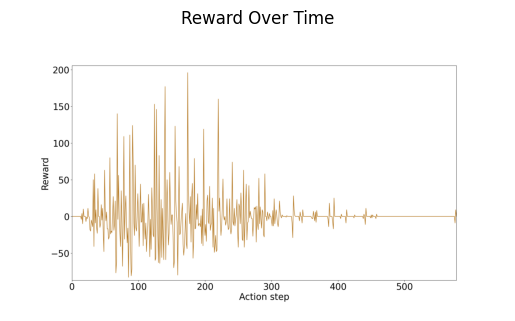

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load and display queue length plot
queue_img = cv2.imread("/content/Traffic-Signal-Control-using-Deep-Q-Learning/models/model_2/test/plot_queue.png")
plt.imshow(queue_img)
plt.title("Queue Length Over Time")
plt.axis("off")
plt.show()

# Load and display reward plot
reward_img = cv2.imread("/content/Traffic-Signal-Control-using-Deep-Q-Learning/models/model_2/test/plot_reward.png")
plt.imshow(reward_img)
plt.title("Reward Over Time")
plt.axis("off")
plt.show()


In [ ]:
!zip -r test_results.zip /content/Traffic-Signal-Control-using-Deep-Q-Learning/models/model_2/test/
from google.colab import files
files.download("test_results.zip")


  adding: content/Traffic-Signal-Control-using-Deep-Q-Learning/models/model_2/test/ (stored 0%)
  adding: content/Traffic-Signal-Control-using-Deep-Q-Learning/models/model_2/test/plot_queue_data.txt (deflated 92%)
  adding: content/Traffic-Signal-Control-using-Deep-Q-Learning/models/model_2/test/Testing_Setup.ini (deflated 32%)
  adding: content/Traffic-Signal-Control-using-Deep-Q-Learning/models/model_2/test/plot_reward_data.txt (deflated 77%)
  adding: content/Traffic-Signal-Control-using-Deep-Q-Learning/models/model_2/test/plot_queue.png (deflated 7%)
  adding: content/Traffic-Signal-Control-using-Deep-Q-Learning/models/model_2/test/plot_reward.png (deflated 6%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>